In [195]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()#
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i,interval = "1D", start=datetime(2018, 3, 1), end=datetime.today()).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data
ticks = ["BTC-USD",'ETH-USD','BNB-USD','SOL-USD','XRP-USD','ADA-USD','AVAX-USD','TRX-USD','DOT-USD','MATIC-USD','LINK-USD','ICP-USD','SHIB-USD','DOGE-USD','LTC-USD','STETH-USD','BCH-USD','ETC-USD','UNI7083-USD','OP-USD','ATOM-USD','LEO-USD','WEOS-USD','NEAR-USD','XLM-USD','LDO-USD','OKB-USD','INJ-USD','IMX10603-USD','FIL-USD','APT21794-USD','XMR-USD','HBAR-USD','BXC5168-USD','KAS-USD','MNT27075-USD','TIA22861-USD','STX4847-USD','VET-USD','CRO-USD','MKR-USD','BSV-USD','GRT6719-USD','RETH-USD','AAVE-USD','SEI-USD','RUNE-USD','HEX-USD','ALGO-USD','ORDI-USD','EGLD-USD','QNT-USD','RNDR-USD','TAO22974-USD','FLOW-USD','SUI20947-USD','MINA-USD','1000SATS-USD','HNT-USD','SNX-USD','FTM-USD','ZRX-USD','ZIL-USD','YGG-USD','XEM-USD','WOO-USD','WLD-USD','WAVES-USD','TRB-USD','TIA-USD','SKL-USD','SFP-USD','SAND-USD','RIF-USD','PYTH-USD','PERP-USD','PENDLE-USD','OGN-USD','MTL-USD','MASK-USD','MANA-USD','LUNA2-USD','LRC-USD','LOOM-USD','KNC-USD','KAVA-USD','JASMY-USD','IOST-USD','GMT-USD','GAS-USD','GALA-USD','FET-USD','EOS-USD','ENS-USD','DYDX-USD','CYBER-USD','CRV-USD','CHZ-USD','CFX-USD','CAKE-USD','C98-USD','BLZ-USD','BIGTIME-USD','BEL-USD','BAND-USD','AXS-USD','AUDIO-USD','ARPA-USD','ARB-USD','ALICE-USD','AGIX-USD','PEPE-USD','FLOKI-USD'] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,BTC-USD,ETH-USD,BNB-USD,SOL-USD,XRP-USD,ADA-USD,AVAX-USD,TRX-USD,DOT-USD,MATIC-USD,...,BEL-USD,BAND-USD,AXS-USD,AUDIO-USD,ARPA-USD,ARB-USD,ALICE-USD,AGIX-USD,PEPE-USD,FLOKI-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-15,51938.554688,2824.378906,354.710815,113.699409,0.562755,0.608363,41.596004,0.131169,7.778054,0.889928,...,0.670387,2.046439,8.049916,0.208696,0.061815,0.000519,1.303883,0.321968,NaN,0.000034
2024-02-16,52160.203125,2803.691406,360.890381,110.445915,0.564960,0.598872,40.312130,0.132923,7.657582,0.952738,...,0.696873,2.073792,8.098240,0.227115,0.065004,0.000522,1.328134,0.382976,NaN,0.000034
2024-02-17,51662.996094,2786.672607,352.908112,108.984016,0.549886,0.608346,39.762489,0.135891,7.704354,0.928708,...,0.705431,2.042518,7.953825,0.244470,0.065400,0.000517,1.327242,0.463148,NaN,0.000033
2024-02-18,52122.546875,2878.998047,349.679962,112.174675,0.556903,0.618734,40.254662,0.135186,7.850059,0.998964,...,0.705889,2.075277,8.194971,0.239191,0.067454,0.000521,1.359684,0.457081,NaN,0.000034
2024-02-19,52234.425781,2902.165771,353.596954,114.221550,0.559548,0.624866,40.108540,0.135804,7.778741,0.999497,...,0.714890,2.085110,8.214293,0.247448,0.072147,0.000523,1.384268,0.549136,NaN,0.000034


In [ ]:
corr_matrix = d.pct_change().corr()
corr_matrix

,BTC-USD,ETH-USD,BNB-USD,SOL-USD,XRP-USD,ADA-USD,AVAX-USD,TRX-USD,DOT-USD,MATIC-USD,...,BEL-USD,BAND-USD,AXS-USD,AUDIO-USD,ARPA-USD,ARB-USD,ALICE-USD,AGIX-USD,PEPE-USD,FLOKI-USD
BTC-USD,1.000000,0.823411,0.646652,0.485194,0.583336,0.691473,0.542406,0.633461,0.640082,0.521003,...,0.460225,0.489291,0.487303,0.452359,0.481443,0.000834,0.619735,0.269219,0.174354,0.360641
ETH-USD,0.823411,1.000000,0.673656,0.573124,0.642741,0.751819,0.563031,0.679614,0.694067,0.585635,...,0.466009,0.545053,0.518379,0.470160,0.522107,-0.002494,0.609276,0.284746,0.225643,0.416639
BNB-USD,0.646652,0.673656,1.000000,0.492946,0.513884,0.593954,0.523318,0.571148,0.566819,0.565923,...,0.412008,0.476622,0.424575,0.415394,0.488127,0.000642,0.621023,0.226386,0.133021,0.352700
SOL-USD,0.485194,0.573124,0.492946,1.000000,0.414726,0.498470,0.514120,0.402491,0.533393,0.482955,...,0.364061,0.437172,0.402075,0.443182,0.412963,0.010062,0.511502,0.170847,0.140576,0.296439
XRP-USD,0.583336,0.642741,0.513884,0.414726,1.000000,0.631424,0.454252,0.589572,0.477527,0.447595,...,0.325470,0.407213,0.415507,0.348932,0.407769,0.020014,0.488726,0.210338,0.088856,0.287824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ARB-USD,0.000834,-0.002494,0.000642,0.010062,0.020014,0.020482,0.005143,0.002170,0.000797,0.001067,...,-0.000361,-0.000774,0.003229,-0.001598,0.002780,1.000000,-0.003089,0.002259,0.001426,-0.001731
ALICE-USD,0.619735,0.609276,0.621023,0.511502,0.488726,0.558228,0.574783,0.487155,0.612408,0.544105,...,0.492000,0.518600,0.669469,0.573099,0.535075,-0.003089,1.000000,0.153668,0.159568,0.308181
AGIX-USD,0.269219,0.284746,0.226386,0.170847,0.210338,0.265042,0.175215,0.245585,0.208900,0.197763,...,0.150381,0.189788,0.231045,0.127443,0.180687,0.002259,0.153668,1.000000,0.066070,0.251524
PEPE-USD,0.174354,0.225643,0.133021,0.140576,0.088856,0.136080,0.168295,0.100365,0.166834,0.179747,...,0.120113,0.117662,0.160876,0.142573,0.089826,0.001426,0.159568,0.066070,1.000000,0.080388


In [38]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=200)
# sn.heatmap(corr_matrix, annot = True)
for tik in ticks:
    print(tik,sum(d[tik].dropna()))
print(len(ticks))

BTC-USD 49233888.20751953
ETH-USD 2813573.7168655396
BNB-USD 387974.2024259567
SOL-USD 66518.79769301414
XRP-USD 1083.8309449404478
ADA-USD 1030.168305657804
AVAX-USD 38285.141350746155
TRX-USD 113.70769043825567
DOT-USD 17822.14305996895
MATIC-USD 1145.1890159053728
LINK-USD 20709.79158590734
ICP-USD 20968.788725852966
SHIB-USD 0.014563806169803684
DOGE-USD 144.98404012760147
LTC-USD 202886.96441841125
STETH-USD 2503366.9338378906
BCH-USD 780260.0680007935
ETC-USD 41972.048913002014
UNI7083-USD 14216.529924631119
OP-USD 918.6970831276558
ATOM-USD 20772.428867697716
LEO-USD 4972.821492552757
WEOS-USD 539.6742354035378
NEAR-USD 5452.489266693592
XLM-USD 366.7105383016169
LDO-USD 2588.131860524416
OKB-USD 34797.320875644684
INJ-USD 10315.523446559906
IMX10603-USD 1242.3579245209694
FIL-USD 40665.553594112396
APT21794-USD 3987.263521194458
XMR-USD 313613.8266067505
HBAR-USD 179.82602429389954
BXC5168-USD 443684.47992710257
KAS-USD 21.396603507266263
MNT27075-USD 110.79120206832886
TIA2286

(None,
 Date
 2018-03-01   NaN
 2018-03-02   NaN
 2018-03-03   NaN
 2018-03-04   NaN
 2018-03-05   NaN
               ..
 2024-02-15   NaN
 2024-02-16   NaN
 2024-02-17   NaN
 2024-02-18   NaN
 2024-02-19   NaN
 Name: IDU-USD, Length: 2182, dtype: float64)

<Figure size 1600x1200 with 0 Axes>

In [54]:
#Top cointegrated points pairs
#NEDL excel
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,coint
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import random
n = 119*119 #check pairs
pairs = corr_matrix.unstack().sort_values(ascending=False)[len(ticks):len(ticks)+n].keys()
onep = {}
fivep = {}
ind = 0
checked = {}
counter = 0
acceptable_period = 1000
for p in set(pairs): #picking top correlated pairs
    counter +=1
    print(f'{counter} number of pairs analyzed')
    # X,Y = random.choice(ticks),random.choice(ticks)
    X,Y = p[0],p[1]
    # if (X,Y) in checked or (Y,X) in checked:
    if len(d[X].dropna())<=acceptable_period or len(d[Y].dropna())<=acceptable_period:
        pass
    else:
        print(X,Y)
        checked[random.random()] = X,Y
        df = pd.DataFrame(d[X])
        df[Y] = d[Y]
        df.dropna(subset=[X, Y], inplace=True)
        slope, intercept = np.polyfit(df[X],df[Y], 1)
        coint = slope*df[X] + intercept
        coint_diff = df[Y] - coint
        result = adfuller(coint_diff)
        if result[0] <= result[4]['1%']:
            onep[random.random()] = X,Y ,result[0],result[4]['1%'],coint_diff.std()
        # if result[0] >= result[4]['1%'] and result[0]<=result[4]['5%']:
        #     fivep[random.random()] = X,Y,result[0],result[4]['5%']
'onep',onep,'fivep',fivep
#high cointegrated pairs: QNT-FIL, 

1 number of pairs analyzed
2 number of pairs analyzed
3 number of pairs analyzed
ALGO-USD FET-USD
4 number of pairs analyzed
5 number of pairs analyzed
XEM-USD KAVA-USD
6 number of pairs analyzed
TRX-USD PERP-USD
7 number of pairs analyzed
8 number of pairs analyzed
MANA-USD BXC5168-USD
9 number of pairs analyzed
CHZ-USD BLZ-USD
10 number of pairs analyzed
11 number of pairs analyzed
12 number of pairs analyzed
ETC-USD HEX-USD
13 number of pairs analyzed
14 number of pairs analyzed
15 number of pairs analyzed
XMR-USD AXS-USD
16 number of pairs analyzed
KAVA-USD SOL-USD
17 number of pairs analyzed
18 number of pairs analyzed
19 number of pairs analyzed
20 number of pairs analyzed
NEAR-USD ALICE-USD
21 number of pairs analyzed
22 number of pairs analyzed
LRC-USD BCH-USD
23 number of pairs analyzed
EGLD-USD UNI7083-USD
24 number of pairs analyzed
25 number of pairs analyzed
FET-USD TRB-USD
26 number of pairs analyzed
27 number of pairs analyzed
28 number of pairs analyzed
29 number of pai

('onep',
 {0.4895325305994599: ('ETC-USD',
   'HEX-USD',
   -3.82904741034892,
   -3.434702484091523,
   0.07059982236500156),
  0.36231640237734863: ('ALGO-USD',
   'OGN-USD',
   -4.342055211826963,
   -3.434779131760461,
   0.25396622212613507),
  0.9430402577067771: ('WAVES-USD',
   'ETC-USD',
   -4.272522140241475,
   -3.4333881004322455,
   10.028699353018812),
  0.7545169783515001: ('RIF-USD',
   'GAS-USD',
   -4.068079598007811,
   -3.433899279912197,
   1.8899355513001268),
  0.9854284603279699: ('VET-USD',
   'ADA-USD',
   -5.512658908087482,
   -3.433620581635353,
   0.2585216824648235),
  0.6471792214936334: ('VET-USD',
   'DOGE-USD',
   -4.80071639879562,
   -3.433620581635353,
   0.0391246313995355),
  0.6810901098656809: ('XEM-USD',
   'OGN-USD',
   -4.20378926383032,
   -3.434779131760461,
   0.31253980049088326),
  0.9572908152783408: ('SHIB-USD',
   'MANA-USD',
   -4.801814930846682,
   -3.4356560275160835,
   0.538136825476893),
  0.803143306647995: ('FLOW-USD',
   'O

In [ ]:
# Distance method
#Top cointegrated points pairs
#NEDL excel
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,coint
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import random
n = 60*60 #check pairs
pairs = corr_matrix.unstack().sort_values(ascending=False)[len(ticks):len(ticks)+n].keys()
onep = {}
fivep = {}
ind = 0
checked = {}
counter = 0
for p in set(pairs): #picking top correlated pairs
    counter +=1
    print(f'{counter} number of pairs analyzed')
    # X,Y = random.choice(ticks),random.choice(ticks)
    X,Y = p[0],p[1]
    # if (X,Y) in checked or (Y,X) in checked:
    if 1==False:
        pass
    else:
        print(X,Y)
        checked[random.random()] = X,Y
        df = pd.DataFrame(d[X])
        df[Y] = d[Y]
        df.dropna(subset=[X, Y], inplace=True)
        df[X] = (df[X] - min(df[X]))/(max(df[X]) - min(df[X]))
        df[Y] = (df[Y] - min(df[Y]))/(max(df[Y]) - min(df[Y]))
        coint_diff = df[Y] - df[X]
        result = adfuller(coint_diff)
        if result[0] <= result[4]['1%']:
            onep[random.random()] = X,Y ,result[0],result[4]['1%'],coint_diff.std()
'onep',onep

In [63]:
#std analyze
pd_series = pd.Series(onep)  
std_short = 100
std_long  = 300
diff_zero = 50
#analyzing moving average std
sorted(pd_series, key=lambda x: x[-3])
for elm in sorted(pd_series, key=lambda x: x[2]):
    X,Y = elm[0],elm[1]
    df = pd.DataFrame(d[X])
    df[Y] = d[Y]
    df.dropna(subset=[X, Y], inplace=True)
    slope, intercept = np.polyfit(df[X],df[Y], 1)
    coint = slope*df[X] + intercept
    coint_diff = df[Y] - coint
    if coint_diff[-2] <= coint_diff.mean() - 2.0*coint_diff.std() or coint_diff[-2] >= coint_diff.mean() + 2.0*coint_diff.std():
        # if coint_diff.rolling(std_short).mean().std()/coint_diff.rolling(std_long).mean().std()>3:
        #     difference = sum(abs(coint_diff.rolling(std_long).mean().dropna()-coint_diff.mean()))/len(coint_diff.rolling(std_long).mean().dropna())
            # if difference <= diff_zero:
            # print(elm[0],elm[1],'t-stat',elm[2],'std',elm[-1])
            print(elm)
#distance check
# sorted(pd_series, key=lambda x: x[-3])
# for elm in sorted(pd_series, key=lambda x: x[-3]):
#     X = elm[0]
#     Y = elm[1]
#     df = pd.DataFrame(d[X])
#     df[Y] = d[Y]
#     df[X] = (df[X] - min(df[X]))/(max(df[X]) - min(df[X]))
#     df[Y] = (df[Y] - min(df[Y]))/(max(df[Y]) - min(df[Y]))
#     coint_diff = df[Y] - df[X]  
#     if coint_diff[-2] <= coint_diff.mean() - 1.5*coint_diff.std() or coint_diff[-2] >= coint_diff.mean() + 1.5*coint_diff.std():
#         print(elm[0],elm[1])

('BTC-USD', 'CRV-USD', -12.31607018380602, -3.4354531319230373, 1.0108192571850416)
('CRV-USD', 'SOL-USD', -7.504072550141148, -3.4354531319230373, 42.87261143435164)
('RIF-USD', 'BEL-USD', -5.852850068810355, -3.4356090875394525, 0.5033669806350278)
('ALGO-USD', 'RIF-USD', -5.448570587213176, -3.434195674757572, 0.045234166778077275)
('RIF-USD', 'LTC-USD', -5.32789055376359, -3.4338725134861083, 25.873580144569072)
('LTC-USD', 'RIF-USD', -5.232886453300681, -3.4338725134861083, 0.03347802252401174)
('BEL-USD', 'RIF-USD', -5.02431535605291, -3.4356090875394525, 0.04219638374396789)
('INJ-USD', 'PENDLE-USD', -4.836930500950382, -3.4368734638130847, 0.2877354527976323)
('STX4847-USD', 'ARPA-USD', -4.75372725234455, -3.43457045663604, 0.01660086527674964)
('ADA-USD', 'MKR-USD', -4.731400596036357, -3.4333881004322455, 410.91720785729046)
('VET-USD', 'MKR-USD', -4.684851685984987, -3.433623856429125, 355.9551313741514)
('BLZ-USD', 'LOOM-USD', -4.666335130902167, -3.433406561117599, 0.04119

slope: 0.014241993135391071 intercept: 0.8762592793803929
Test Statistic: -11.679584026252119
p-value: 1.7544354553845003e-21
Critical Values: {'1%': -3.4354531319230373, '5%': -2.8637935995282224, '10%': -2.5679698346531965}
If Test Statistic less than critical values series is stationary
volatility: 0.9892005530815291


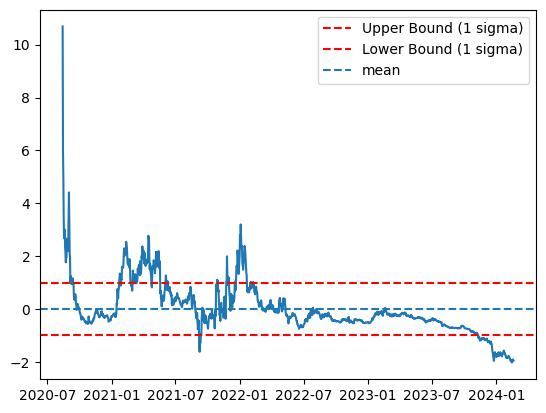

In [557]:
#NEDL coint excel
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,coint
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
X = 'SOL-USD'
Y = 'CRV-USD'
df = pd.DataFrame(d[X])
df[Y] = d[Y]
# print(np.log2(df[Y]))
df.dropna(subset=[X, Y], inplace=True)
#----------------------------------------------------------------------------------------------------
# slope, intercept = np.polyfit(np.log(df[X]),np.log(df[Y]), 1)#polyfit(X,Y,1) #log cointegration
# print('slope:',slope,'intercept:',intercept) #log cointegration
# coint = slope*np.log(df[X]) + intercept #log cointegration
# coint_diff = np.log(df[Y]) - coint #log cointegration
#----------------------------------------------------------------------------------------------------
slope, intercept = np.polyfit(df[X],df[Y], 1)#polyfit(X,Y,1) #normal cointegration
print('slope:',slope,'intercept:',intercept) #normal cointegration
coint = slope*df[X] + intercept #normal cointegration
coint_diff = df[Y] - coint #normal cointegration
result = adfuller(coint_diff)
print("Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
print('If Test Statistic less than critical values series is stationary')
vol = coint_diff.std()
print('volatility:',vol)
fig, ax = plt.subplots()
ax.plot(coint_diff)#.plot(ax=ax,label = 'difference  ')
ax.axhline(1*vol,color = 'r', linestyle='--', label='Upper Bound (1 sigma)')
ax.axhline(-1*vol,color = 'r', linestyle='--', label='Lower Bound (1 sigma)')
ax.axhline(coint_diff.mean(), linestyle='--', label='mean')
# coint_diff.rolling(std_long).mean().plot(label='MA-L')
# coint_diff.rolling(std_short).mean().plot(label = 'MA-S')
plt.legend()
plt.show()

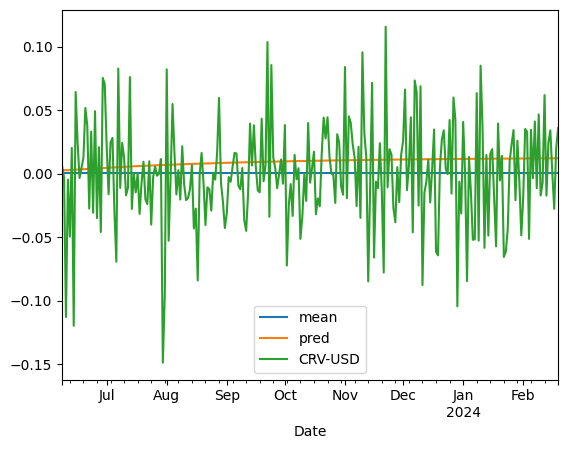

In [440]:
#GARCH model
from arch import arch_model
ret = d['CRV-USD'].pct_change().dropna()
length = len(ret)
split = 0.995
train = ret[:int(split*length)]
test  = ret[int(split*length):]
pg = qg = range(3)
model = arch_model(train, p=2, q=3)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=len(test))
last_date = train.index[-1]
next_days = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=len(test))
predictions = pd.Series(pred.variance.values[0],index = next_days)
mean_vol    = pd.Series(pred.mean.values[0], index = next_days)
mean_vol.plot(label = 'mean')
predictions.plot(label = 'pred')
test_vol = pd.Series(test.std(), index = next_days)
# test_vol.plot(label = 'actual total volatility')
test.plot()
plt.legend()

In [540]:
#coing with high volatility
for tik in ticks:
    tiik = d[tik].pct_change().dropna() 
    period =5
    rolling_std = tiik.rolling(period).std()
    if tiik.shape[0] < d.shape[0]/2:
        pass
    else:
        if rolling_std.tail(1).values[0]>  rolling_std.mean() + 1*rolling_std.std():
            print(tik)
        

VET-USD
RIF-USD


<AxesSubplot: xlabel='Date'>

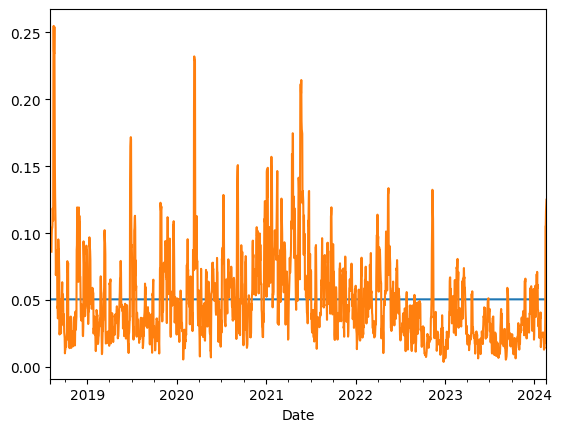

In [541]:
# plotting tik with high recent volatility
tiik = d['VET-USD'].pct_change().dropna() 
rolling_std = tiik.rolling(period).std()
index = rolling_std.index
rolling_mean = pd.Series(rolling_std.mean(),index = index)
# tiik.plot()
rolling_mean.plot()
rolling_std.plot()

In [561]:
#ARMA
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
ret = d['SOL-USD'].pct_change().dropna()
length = len(ret)
split = 0.995
train = ret[:int(split*length)]
test  = ret[int(split*length):]
print('Number of prediciton period:',len(test))
# test = (test - min(test))/(max(test) - min(test)) #normalization 0-1
test = (test - np.mean(test))/test.std() #standarzation
pa=qa = range(1,7)
best_obj   = 9999999
param_best = (0,0,0) 
for p in pa:
        for q in qa: 
            model = ARIMA(train,order = (p,0,q))
            fit = model.fit()
            forecast = fit.forecast(steps=len(test))
            # forecast = (forecast - min(forecast))/(max(forecast) - min(forecast)) #normalization 0-1
            forecast = (forecast - np.mean(forecast))/forecast.std() #standarzation
            #actual values
            # obj = np.sqrt((1/len(forecast))*(sum((test-forecast)**2))) #RMSE
            obj = (1/len(forecast))*(sum((test-forecast)**2)) #MSE
            # obj = (1/len(forecast))*sum(abs(test-forecast)) #MAD
            # obj = sum(abs(test-forecast))#absolute sum of differenece
            # obj = sum(test-forecast)**2#Sum of squared
            # #MA values
            # obj = (1/len(forecast))*(sum((test.rolling(2).mean().dropna()-forecast.rolling(2).mean().dropna())**2))
            if obj<best_obj:
                best_obj = obj
                param_best = (p,0,q)
            print('p:',p,'q:',q,'obj:',obj)
param_best,best_obj

Number of prediciton period: 8
p: 1 q: 1 obj: 0.4093085361459608
p: 1 q: 2 obj: 0.41691747143061825
p: 1 q: 3 obj: 0.4239181833337732
p: 1 q: 4 obj: 0.4516623576736134
p: 1 q: 5 obj: 0.5055829583353839
p: 1 q: 6 obj: 0.9067956501540105
p: 2 q: 1 obj: 0.4398553455776848
p: 2 q: 2 obj: 0.4289860122365825
p: 2 q: 3 obj: 0.5009881483728272
p: 2 q: 4 obj: 0.6287809736003606
p: 2 q: 5 obj: 0.5698648488962069
p: 2 q: 6 obj: 0.3265421387520648
p: 3 q: 1 obj: 0.4469525602351876
p: 3 q: 2 obj: 0.4185020364894008
p: 3 q: 3 obj: 0.8008892902279127
p: 3 q: 4 obj: 0.4873851564533232
p: 3 q: 5 obj: 0.582951208722314
p: 3 q: 6 obj: 0.5914578721052369
p: 4 q: 1 obj: 0.5057478400374615
p: 4 q: 2 obj: 0.40001440619592776
p: 4 q: 3 obj: 0.5125823060317557
p: 4 q: 4 obj: 0.5671190633509029
p: 4 q: 5 obj: 0.5180157498887694
p: 4 q: 6 obj: 0.5930542118391644
p: 5 q: 1 obj: 0.5357253396918971
p: 5 q: 2 obj: 0.4039516556674897
p: 5 q: 3 obj: 0.5103955592946321
p: 5 q: 4 obj: 0.5239224089161295
p: 5 q: 5 obj: 0

((2, 0, 6), 0.3265421387520648)

('mean return of the coin:', 0.005967946367053518)

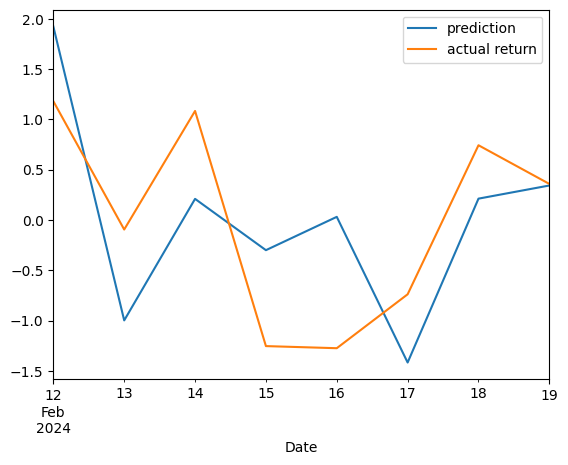

In [563]:
model = ARIMA(train,order = (2,0,6))
fit = model.fit()
forecast = fit.forecast(steps=len(test))
forecast = (forecast - np.mean(forecast))/forecast.std()
tested = (test - np.mean(test))/test.std()
forecast.plot(label = 'prediction')
tested.plot(label = 'actual return')
# forecast.rolling(2).mean().plot(label = 'MA-pred')
# tested.rolling(2).mean().plot(label = 'MA-actual')
# forecast.cumsum().plot(label='cumsum pred')
# tested.cumsum().plot(label = 'cumsum actual')
plt.legend()
'mean return of the coin:',ret.mean()

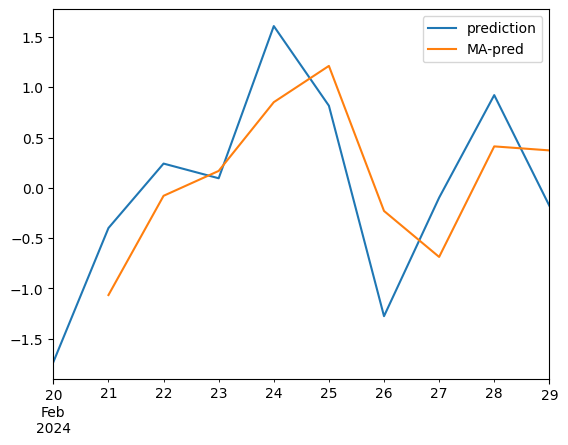

In [564]:
#REAL FUTURE
tikk = 'SOL-USD'
model = ARIMA(d[tikk].pct_change(),order = (2,0,6))
fit = model.fit()
forecast = fit.forecast(steps= 10)
forecast = (forecast - np.mean(forecast))/forecast.std()
# forecast = forecast * d[tikk].pct_change().std() + d[tikk].pct_change().mean()
forecast.plot(label = 'prediction')
forecast.rolling(2).mean().plot(label = 'MA-pred')

plt.legend()

<AxesSubplot: xlabel='Date'>

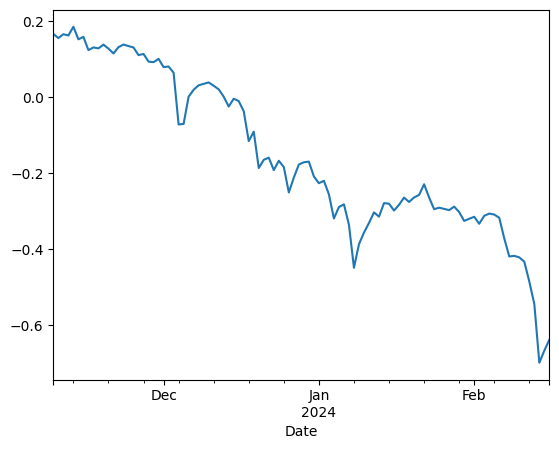

In [58]:
# d['ICP-USD'].tail(50).plot(label = 'Y')
# df[X][1646:1687].plot(label = 'X')
coint_diff.tail(100).plot()
# plt.legend()

In [ ]:
#simulating trade
lastpos = 0
pos = 0
w = [1/(1+slope),slope/(1+slope)]
print(w)
average_pos = []
average_profit = []
for t in range(len(coint_diff)):
    if coint_diff[t] >= coint_diff.mean() + 1*coint_diff.std():#short Y
        lastpos = t
        pos = -1
    if coint_diff[t] <= coint_diff.mean() - 1*coint_diff.std():#long Y
        lastpos = t
        pos = +1
    if coint_diff[t] >= coint_diff.mean()-0.1*coint_diff.std() and coint_diff[t] <= coint_diff.mean()+0.1*coint_diff.std():
        if lastpos == 0:
            pass
        else:
            average_pos.append(t-lastpos)
            print('Y',df[Y][lastpos],'X',df[X][lastpos],'prices',df[Y][t],df[X][t],t-lastpos)
            if pos == +1:
                print('portfolio(long y short x):',((w[0])*(df[Y][t]/df[Y][lastpos]-1))+((-w[1])*(df[X][t]/df[X][lastpos]-1)) )
                average_profit.append(((w[0])*(df[Y][t]/df[Y][lastpos]-1))+((-w[1])*(df[X][t]/df[X][lastpos]-1)))
                print('equal weight:',((0.5)*(df[Y][t]/df[Y][lastpos]-1))+((-0.5)*(df[X][t]/df[X][lastpos]-1)))
                print('only Y:', df[Y][t]/df[Y][lastpos]-1)
            if pos == -1:
                print('portfolio(short y long x):',((-w[0])*(df[Y][t]/df[Y][lastpos]-1))+((w[1])*(df[X][t]/df[X][lastpos]-1)) )
                print('equal weight:',((-0.5)*(df[Y][t]/df[Y][lastpos]-1))+((0.5)*(df[X][t]/df[X][lastpos]-1)))
                print('only Y:', -1*(df[Y][t]/df[Y][lastpos]-1))
                average_profit.append(((-w[0])*(df[Y][t]/df[Y][lastpos]-1))+((w[1])*(df[X][t]/df[X][lastpos]-1)))
            pos = 0
            lastpos = 0
'average holding position:',np.mean(average_pos),'average profit:',np.mean(average_profit)

Test Statistic: -2.139742692892744
p-value: 0.22883693371442038
Critical Values: {'1%': -3.4345759114452012, '5%': -2.8634064827605656, '10%': -2.5677636853277837}
If Test Statistic less than critical values series is stationary
volatility: 0.12313860202880003


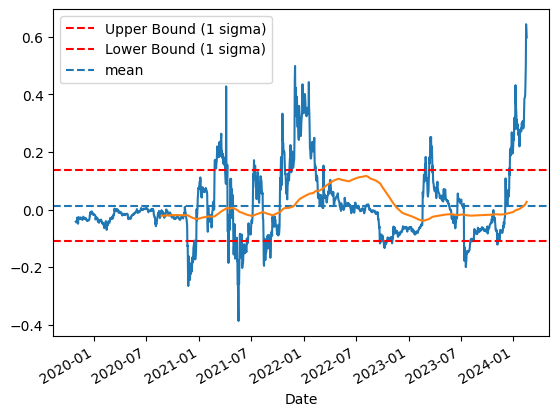

In [60]:
#distance
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,coint
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
X = 'XRP-USD'
Y = 'STX4847-USD'
df = pd.DataFrame(d[X])
df[Y] = d[Y]
# print(np.log2(df[Y]))
df.dropna(subset=[X, Y], inplace=True)
#----------------------------------------------------------------------------------------------------
# slope, intercept = np.polyfit(np.log(df[X]),np.log(df[Y]), 1)#polyfit(X,Y,1) #log cointegration
# print('slope:',slope,'intercept:',intercept) #log cointegration
# coint = slope*np.log(df[X]) + intercept #log cointegration
# coint_diff = np.log(df[Y]) - coint #log cointegration
#----------------------------------------------------------------------------------------------------
df[X] = (df[X] - min(df[X]))/(max(df[X]) - min(df[X]))
df[Y] = (df[Y] - min(df[Y]))/(max(df[Y]) - min(df[Y]))
coint_diff = df[Y] - df[X]
result = adfuller(coint_diff)
print("Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
print('If Test Statistic less than critical values series is stationary')
vol = coint_diff.std()
mean= coint_diff.mean()
print('volatility:',vol)
fig, ax = plt.subplots()
ax.plot(coint_diff)#.plot(ax=ax,label = 'difference  ')
ax.axhline(mean+1*vol,color = 'r', linestyle='--', label='Upper Bound (1 sigma)')
ax.axhline(mean-1*vol,color = 'r', linestyle='--', label='Lower Bound (1 sigma)')
ax.axhline(coint_diff.mean(), linestyle='--', label='mean')
coint_diff.rolling(300).mean().plot()
plt.legend()
plt.show()

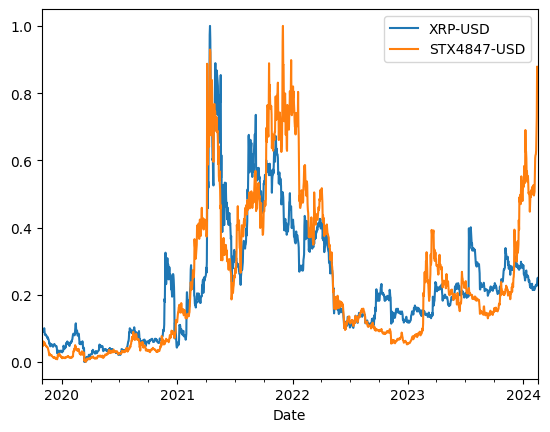

In [61]:
df[X] = (df[X] - min(df[X]))/(max(df[X]) - min(df[X]))
df[Y] = (df[Y] - min(df[Y]))/(max(df[Y]) - min(df[Y]))
#plotting spread
# (df[X] - df[Y]).plot()
# plt.axhline((df[X] - df[Y]).mean())
df[X][:].plot(label = f'{X}')
df[Y][:].plot(label = f'{Y}')
plt.legend()

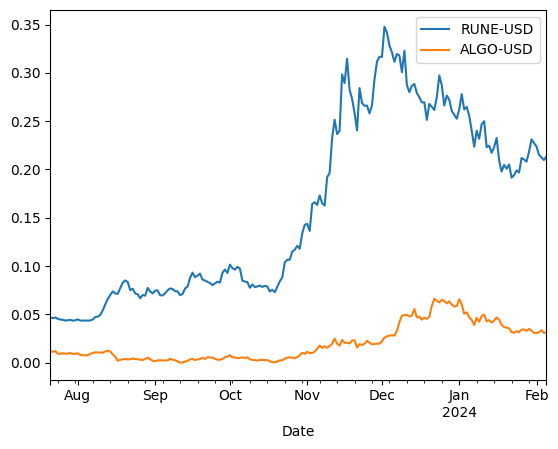

In [98]:
df[X].tail(200).plot(label = f'{X}')
df[Y].tail(200).plot(label = f'{Y}')
plt.legend()

In [19]:
#Analyzing cointegration of chosens with others

check = 'DOT-USD'
print("Critical Values 1%:", result[4]['1%'])
for tick in ticks:#X
    df = pd.DataFrame(d[tick])
    df[check] = d[check]
    df.dropna(subset=[tick, check], inplace=True)
    slope, intercept = np.polyfit(df[tick],df[check], 1)#polyfit(X,Y,1) #normal cointegration
    coint = slope*df[tick] + intercept #estimation of check
    coint_diff = df[check] - coint #normal cointegration
    result = adfuller(coint_diff)
    if result[0] <= result[4]['1%']:
        print(check,tick)
        print('slope:',slope,'intercept:',intercept) #normal cointegration
        # print()
        print("*******Test Statistic********:", result[0])


Critical Values 1%: -3.431161485373321
DOT-USD ETC-USD
slope: 0.3854961334255175 intercept: -1.7025383891662365
*******Test Statistic********: -3.7888521890647255
DOT-USD OP-USD
slope: 1.544089873656263 intercept: 2.5739066714725456
*******Test Statistic********: -3.496938646855897
DOT-USD HBAR-USD
slope: 82.69062661778399 intercept: 0.5163368731338562
*******Test Statistic********: -3.448211242973615
DOT-USD GRT6719-USD
slope: 36.027175271081965 intercept: 0.9570500640052034
*******Test Statistic********: -4.225882351888084
DOT-USD EGLD-USD
slope: 0.09596035459421538 intercept: 1.7916593279149584
*******Test Statistic********: -3.608595401627041
DOT-USD MINA-USD
slope: 4.090616348646104 intercept: 2.872426953707634
*******Test Statistic********: -3.608121916443403


In [161]:
from scipy.optimize import minimize

def objective(x):
    x1 = x[0]
    x2 = x[1]
    return adfuller(df[Y] - (x1*df[X] + x2))[0]
    
x = [0,0]
res = minimize(objective, x, method='Nelder-Mead', bounds=[(-1000, 1000),(-100000,100000)])
res

 final_simplex: (array([[0.50678454, 0.09337494],
       [0.50678081, 0.09345442],
       [0.50678012, 0.09343638]]), array([-1.58773186, -1.58772833, -1.58772768]))
           fun: -1.5877318580875313
       message: 'Optimization terminated successfully.'
          nfev: 101
           nit: 50
        status: 0
       success: True
             x: array([0.50678454, 0.09337494])

Test Statistic: -1.5877318580875313
p-value: 0.4897532346547466
Critical Values: {'1%': -3.438633612472885, '5%': -2.865196199232788, '10%': -2.5687169024206713}
If Test Statistic less than critical values series is stationary
volatility: 0.04891866061550213


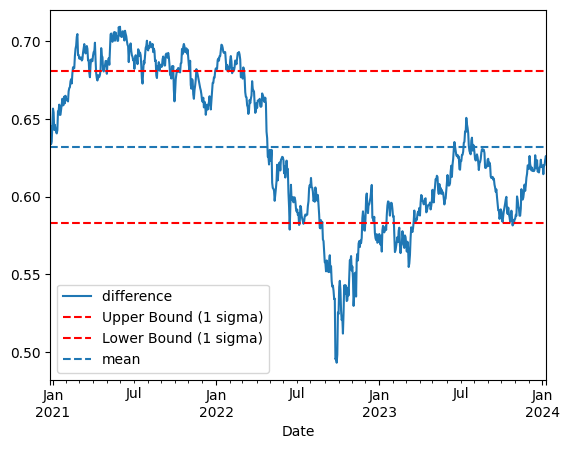

In [162]:
#plotting best
coint = res.x[0]*df[X] + res.x[1]
coint_diff = df[Y] - coint
result = adfuller(coint_diff)
print("Test Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
print('If Test Statistic less than critical values series is stationary')
vol = coint_diff.std()
mean = coint_diff.mean()
print('volatility:',vol)
fig, ax = plt.subplots()

coint_diff.plot(ax=ax,label = 'difference  ')
ax.axhline(mean +1*vol,color = 'r', linestyle='--', label='Upper Bound (1 sigma)')
ax.axhline(mean -1*vol,color = 'r', linestyle='--', label='Lower Bound (1 sigma)')
ax.axhline(mean, linestyle='--', label='mean')
plt.legend()
plt.show()

In [65]:
#NEDL python
import scipy.optimize as spop
import statsmodels.api as sm
#two = a + b*one
def unit_root(b):
    one = LINK = d['LINK-USD'] # S&P 500
    two = d['SOL-USD'] # Berkshire Class A share
    a = np.average(two - b*one)
    fair_value = a + b*one
    diff = np.array(fair_value - two)
    diff_diff = diff[1:] - diff[:-1]
    reg = sm.OLS(diff_diff,diff[:-1])
    res = reg.fit()
    return res.params[0]/res.bse[0]
res1 = spop.minimize(unit_root, 0,method = 'Nelder-Mead')
t_opt = res1.fun
b_opt = float(res1.x)
a_opt = np.average(two - b_opt*one)
fair_value = a_opt + b_opt*one
b_opt

-1172061803023172.0